<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/ola_ride_request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("/content/ola.csv")

In [3]:
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137


In [4]:
df.shape

(10886, 9)

In [5]:
df.isnull().sum()

,0
datetime,0
season,0
weather,0
temp,1632
humidity,1632
windspeed,1632
casual,0
registered,0
count,0


In [11]:
parts = df["datetime"].str.split(" ", expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,


In [13]:
parts = df["date"].str.split("-", expand=True)
df["year"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["day"] = parts[2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,year,month
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,2011,1
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,2011,1
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,2011,1
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,2011,1
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,2011,1


In [15]:
from datetime import datetime

In [16]:
df["datetime"]=pd.to_datetime(df["datetime"])

In [17]:
df["month"]=df["datetime"].dt.month

In [18]:
df["year"]=df["datetime"].dt.month

In [19]:
df["day"]=df["datetime"].dt.month

In [25]:
from datetime import datetime
def weekend_or_weekday(year, month, day):
  try:
    d= datetime(year, month, day)
    return 0 if d.weekday()>4 else 1
  except ValueError:
    return np.nan

  df["weekday"]=df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

In [21]:
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,year,month,weekday
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,1,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,1,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,1,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,1,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,1,0


In [22]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,year,month,weekday,am_or_pm
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,1,0,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,1,0,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,1,0,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,1,0,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,1,0,0


In [24]:
from datetime import date
import holidays

def is_holiday(x):
   india_holidays= holidays.country_holidays( 'IN')
   if india_holidays.get(x):
    return 1
   else:
    return 0
df["holidays"]= df['date'].apply(is_holiday)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,year,month,weekday,am_or_pm,holidays
0,2011-01-01 00:00:00,3,2,7.653428,122.430885,18.783703,5,128,315.731778,2011-01-01,0,1,1,1,0,0,0
1,2011-01-01 01:00:00,4,3,13.269244,101.703802,14.035245,36,184,340.457093,2011-01-01,1,1,1,1,0,0,0
2,2011-01-01 02:00:00,1,3,30.886922,77.583743,45.365080,34,97,224.278595,2011-01-01,2,1,1,1,0,0,0
3,2011-01-01 03:00:00,3,1,10.463377,114.925671,25.347168,6,47,132.169549,2011-01-01,3,1,1,1,0,0,0
4,2011-01-01 04:00:00,3,4,30.214783,149.193592,20.288982,14,199,315.867137,2011-01-01,4,1,1,1,0,0,0


In [26]:
df.drop(['datetime', 'date'],
        axis=1,
        inplace=True)

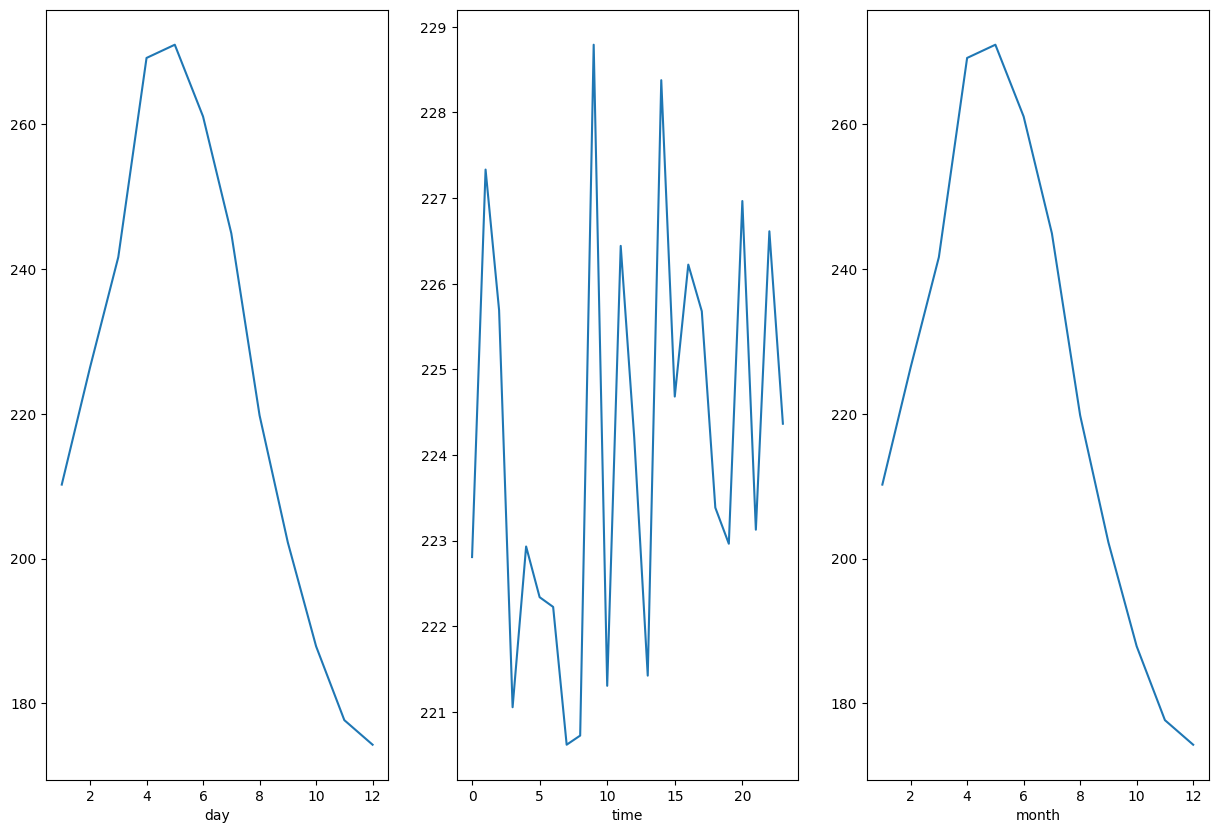

In [29]:
features= ['day','time', 'month']
plt.figure(figsize=(15,10))
for i, col in enumerate(features):
  plt.subplot(1,3,i+1)
  df.groupby(col).mean()['count'].plot()
plt.show()

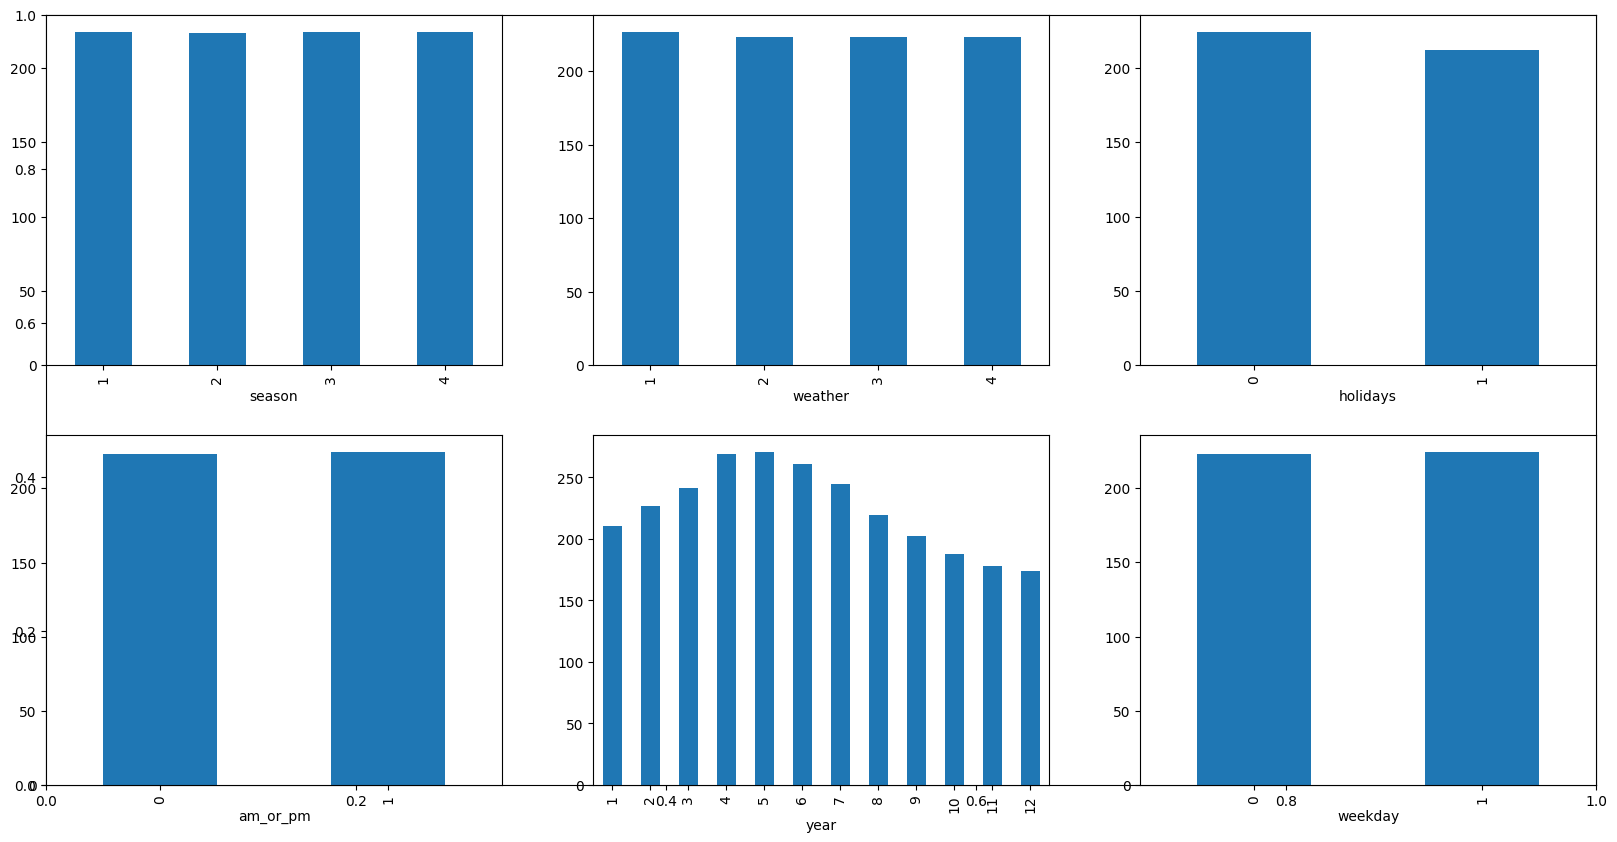

In [30]:
features = ['season', 'weather', 'holidays',\
            'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['count'].plot.bar()
plt.show()

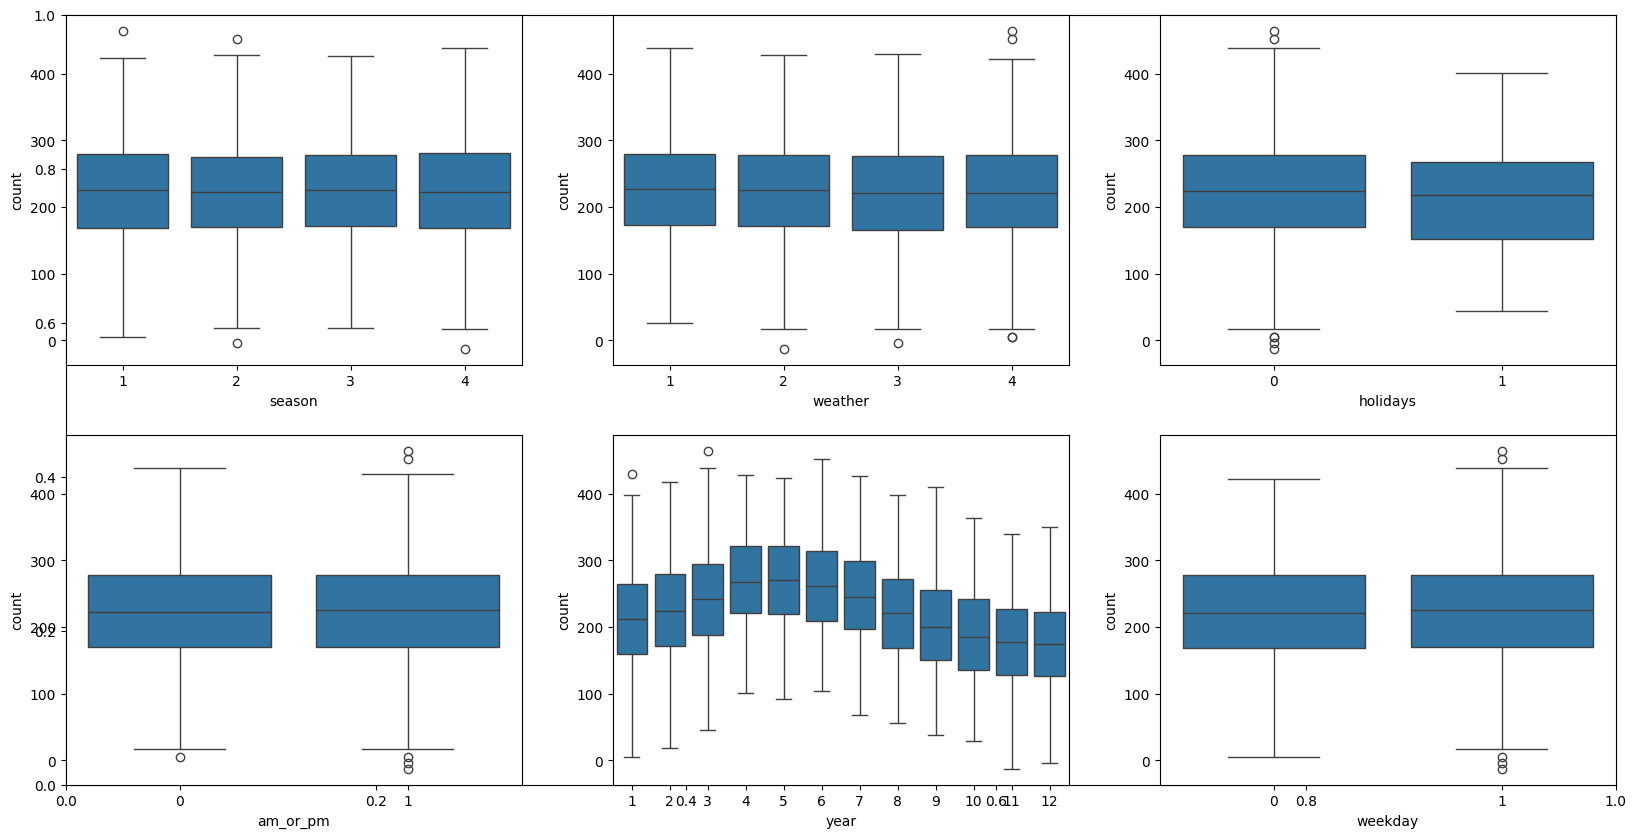

In [33]:
cols= ['season','weather','holidays',\
       'am_or_pm','year','weekday']
plt.subplots(figsize=(20,10))
for i, col in enumerate(cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(x=col, y=df['count'], data=df)
plt.show()

In [35]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.1,
                                                  random_state=22)
X_train.shape, X_val.shape

((4315, 12), (480, 12))

In [41]:
scaler=StandardScaler()

In [42]:
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [52]:
models=[LinearRegression(), Lasso(), Ridge(), RandomForestRegressor()]
for model in models:
  model.fit(X_train, Y_train)
  y_pred=model.predict(X_val)
  mae=mean_absolute_error(Y_val, y_pred)
  mse=mean_squared_error(Y_val, y_pred)
  rmse=np.sqrt(mse)
  print(model, mae, mse, rmse)

LinearRegression() 58.129948337576586 4942.326393672466 70.30168130046725
Lasso() 58.13842869502626 4941.400392967843 70.29509508470589
Ridge() 58.12992868289319 4942.309837898113 70.30156355230027
RandomForestRegressor() 56.71133011287115 4742.98443532389 68.86932869807785
